In [27]:
import numpy as np 
import tensorflow as  tf 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [28]:
data=pd.read_csv('./Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
data = data.drop(columns = ['CustomerId', 'Surname','RowNumber'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
data['Gender']=data['Gender'].apply(lambda x :  0 if x=='male' else 1)
data['Gender']=data['Gender'].astype(int)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Geography']=label_encoder.fit_transform(data['Geography'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


Data Analysis

([<matplotlib.patches.Wedge at 0x21ee74e4510>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'Not Exited'),
  Text(0.8823431426537006, -0.6568642010431012, 'Exited')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

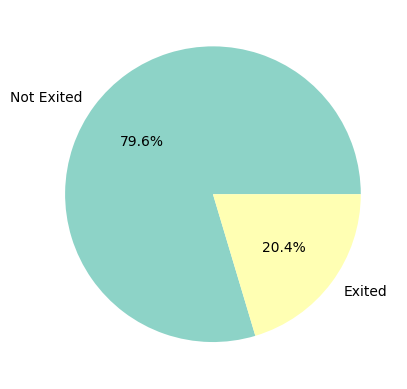

In [32]:
value_counts=data['Exited'].value_counts()
plt.pie(value_counts, labels=['Not Exited', 'Exited'], autopct='%1.1f%%', colors=sns.color_palette('Set3'))

In [33]:
value_counts

Exited
0    7963
1    2037
Name: count, dtype: int64

In [34]:
X=data.drop('Exited',axis=1)
y=data['Exited']

Standardized Data

In [35]:
X=np.array(X)
X=(X-X.mean())/X.std()

Split Data

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

Model Evaluation

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
# import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Anubhav Trithahi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [38]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)
logistic_regression_pred = logistic_regression_model.predict(x_test)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, logistic_regression_pred))
print("Classification Report:\n", classification_report(y_test, logistic_regression_pred))

Logistic Regression:
Accuracy: 0.8035
Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



c:\Users\Anubhav Trithahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anubhav Trithahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Anubhav Trithahi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [39]:
# Random Forests
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)
random_forest_pred = random_forest_model.predict(x_test)

print("Random Forests:")
print("Accuracy:", accuracy_score(y_test, random_forest_pred))
print("Classification Report:\n", classification_report(y_test, random_forest_pred))

Random Forests:
Accuracy: 0.8715
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.48      0.60       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [40]:
# XGBoost (Gradient Boosting)
# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(x_train, y_train)
# xgb_pred = xgb_model.predict(x_test)

# print("XGBoost (Gradient Boosting):")
# print("Accuracy:", accuracy_score(y_test, xgb_pred))
# print("Classification Report:\n", classification_report(y_test, xgb_pred))

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)

# Evaluate the model's performance
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:")
print(classification_report(y_test, dt_pred))

Decision Tree Classifier:
Accuracy: 0.7905
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1607
           1       0.47      0.54      0.50       393

    accuracy                           0.79      2000
   macro avg       0.68      0.70      0.69      2000
weighted avg       0.80      0.79      0.80      2000



Best acc = 87% use # Random Forests